In [2]:
%matplotlib inline
from matplotlib import style, figure
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt
from datetime import date

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, MetaData, Date, cast

In [13]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [18]:
#Inspect Tables
inspector = inspect(engine)
tables = inspector.get_table_names()
for table in tables:
    print("----------------")
    print("Table: "+table)
    columns = inspector.get_columns(table)
    for col in columns:
        print(col["name"],col["type"])

----------------
Table: measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
----------------
Table: station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
latest_date = pd.read_sql(session.query(Measurement).\
                     order_by(Measurement.date.desc()).statement,session.bind)["date"][1]
print(latest_date)

2017-08-23


In [20]:
# Calculate the date 1 year ago from the last data point in the database
from dateutil import parser
latest_date_dt = parser.parse(latest_date)
year_ago_date = latest_date_dt - dt.timedelta(days=365)
print(year_ago_date)

2016-08-23 00:00:00


In [21]:
# Perform a query to retrieve the data and precipitation scores
recent_year = session.query(Measurement.date, Measurement.prcp).\
     filter(Measurement.date >= year_ago_date).all()

recent_year

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [34]:
from flask import jsonify
latest_date = pd.read_sql(session.query(Measurement).order_by(Measurement.date.desc()).statement,session.bind)["date"][1]
latest_date_dt = parser.parse(latest_date)
year_ago_date = latest_date_dt - dt.timedelta(days=365)
recent_year = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago_date).all()
recent_year_prcp = []
for r in recent_year:
    row = {}
    row["date"] = recent_year[0]
    row["prcp"] = recent_year[1]
    recent_year_prcp.append(row)

# Convert list of tuples into normal list
recent_year_prcp = list(np.ravel(recent_year_prcp))
recent_year_prcp

[{'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 0.08)},
 {'date': ('2016-08-24', 0.08), 'prcp': ('2016-08-25', 

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
recent_year_df = pd.read_sql(session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.station,Measurement.tobs).\
                 filter(Measurement.date >= year_ago_date).\
                 order_by(Measurement.date.asc()).statement,session.bind)
recent_year_df = recent_year_df.set_index(recent_year_df.date)
print(recent_year_df.head(3))
print(recent_year_df.tail(3))

              id        date  prcp      station  tobs
date                                                 
2016-08-24  2365  2016-08-24  0.08  USC00519397  79.0
2016-08-24  5092  2016-08-24  2.15  USC00513117  76.0
2016-08-24  7332  2016-08-24  2.28  USC00514830  80.0
               id        date  prcp      station  tobs
date                                                  
2017-08-23   7635  2017-08-23  0.00  USC00514830  82.0
2017-08-23  12187  2017-08-23  0.08  USC00519523  82.0
2017-08-23  19550  2017-08-23  0.45  USC00516128  76.0


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 7 Text xticklabel objects>)

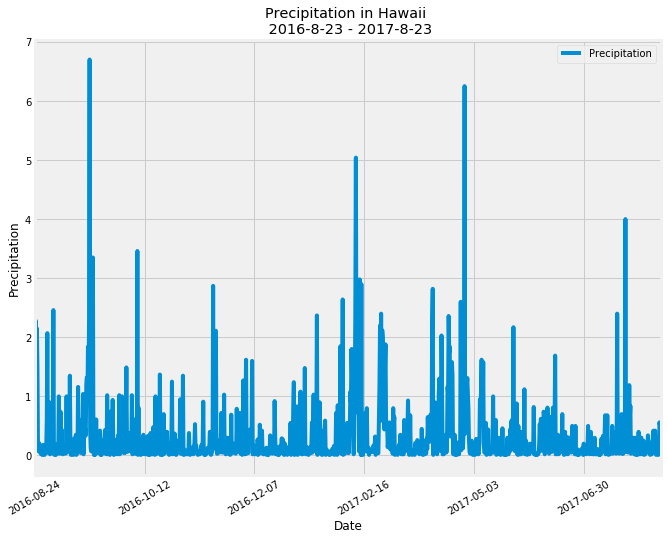

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
ry_df_cleaned = recent_year_df[recent_year_df.prcp !=0]
ry_df_cleaned = ry_df_cleaned.dropna(axis=0, how='any')
ry_df_cleaned.plot('date','prcp',figsize=(10,8))
plt.title("Precipitation in Hawaii \n 2016-8-23 - 2017-8-23")
plt.xlabel('Date')
plt.ylabel('Precipitation')
plt.legend(["Precipitation"])
plt.xticks(rotation=30)

![precipitation](Images/precipitation.png)

In [24]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec = pd.read_sql(session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.station,Measurement.tobs).\
                 filter(Measurement.date >= year_ago_date).\
                 order_by(Measurement.date.asc()).statement,session.bind)
prec = prec.set_index(prec.date)
prec.rename(columns={
    "prcp":"Precipitation"
})
prec.describe()

id         prcp         tobs
count   2223.000000  2015.000000  2223.000000
mean   10159.397211     0.176462    74.578947
std     5604.268703     0.460288     4.612232
min     2365.000000     0.000000    58.000000
25%     5287.500000     0.000000    71.000000
50%     8931.000000     0.020000    75.000000
75%    14751.500000     0.130000    78.000000
max    19550.000000     6.700000    87.000000

![describe](Images/describe.png)

In [25]:
# Design a query to show how many stations are available in this dataset?
session.query(Station.id).count()

9

In [35]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stat_all = pd.read_sql(session.query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).statement,session.bind)
stat_all = stat_all.rename(columns={
                            "id":"Station Id"
})
prec_all = pd.read_sql(session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.station, Measurement.tobs).statement,session.bind)
prec_all = prec_all.rename(columns={
                            "id":"Measurement Id"
                           })

merged = pd.merge(prec_all, stat_all, how='outer', on='station')

grouped = merged.groupby(by="Station Id").count()
s_count = grouped.iloc[:,[1]]
s_count = s_count.sort_values("date",ascending=False)
s_count = s_count.rename(columns={
    "date":"No. of Measurements"
})
stations_count = pd.merge(s_count,stat_all,how="outer",on='Station Id')
stations_count
stat_all

Station Id      station                                    name  latitude  \
0           1  USC00519397                    WAIKIKI 717.2, HI US  21.27160   
1           2  USC00513117                    KANEOHE 838.1, HI US  21.42340   
2           3  USC00514830  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130   
3           4  USC00517948                       PEARL CITY, HI US  21.39340   
4           5  USC00518838              UPPER WAHIAWA 874.3, HI US  21.49920   
5           6  USC00519523      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556   
6           7  USC00519281                     WAIHEE 837.5, HI US  21.45167   
7           8  USC00511918       HONOLULU OBSERVATORY 702.2, HI US  21.31520   
8           9  USC00516128            MANOA LYON ARBO 785.2, HI US  21.33310   

   longitude  elevation  
0 -157.81680        3.0  
1 -157.80150       14.6  
2 -157.83740        7.0  
3 -157.97510       11.9  
4 -158.01110      306.6  
5 -157.71139       19.5  
6 -157.84889       32.9  
7 -157.99920        0.9  
8 -157.80250      152.4

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature for the most active station?
top_station = stations_count.name[0]
top_station_df = pd.read_sql(session.query(Station.id,Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).\
                  filter(Station.name == top_station).\
                 order_by(Station.id.asc()).statement,session.bind)
top_station_df = merged[merged['name'] == top_station]
print(f"Most Active Station: {stations_count.name[0]}")
print("----------------------------------------")
print(f"Lowest recorded temperature: {top_station_df.tobs.min()}")
print(f"Highest recorded temperature: {top_station_df.tobs.max()}")
print(f"Average Temperature temperature: {top_station_df.tobs.mean()}")
top_station_df
print(merged["Measurement Id"].count())
merged

Most Active Station: WAIHEE 837.5, HI US
----------------------------------------
Lowest recorded temperature: 54.0
Highest recorded temperature: 85.0
Average Temperature temperature: 71.66378066378067
19550


Measurement Id        date  prcp      station  tobs  Station Id  \
0                   1  2010-01-01  0.08  USC00519397  65.0           1   
1                   2  2010-01-02  0.00  USC00519397  63.0           1   
2                   3  2010-01-03  0.00  USC00519397  74.0           1   
3                   4  2010-01-04  0.00  USC00519397  76.0           1   
4                   5  2010-01-06   NaN  USC00519397  73.0           1   
5                   6  2010-01-07  0.06  USC00519397  70.0           1   
6                   7  2010-01-08  0.00  USC00519397  64.0           1   
7                   8  2010-01-09  0.00  USC00519397  68.0           1   
8                   9  2010-01-10  0.00  USC00519397  73.0           1   
9                  10  2010-01-11  0.01  USC00519397  64.0           1   
10                 11  2010-01-12  0.00  USC00519397  61.0           1   
11                 12  2010-01-14  0.00  USC00519397  66.0           1   
12                 13  2010-01-15  0.00  USC00519397  65.0           1   
13                 14  2010-01-16  0.00  USC00519397  68.0           1   
14                 15  2010-01-17  0.00  USC00519397  64.0           1   
15                 16  2010-01-18  0.00  USC00519397  72.0           1   
16                 17  2010-01-19  0.00  USC00519397  66.0           1   
17                 18  2010-01-20  0.00  USC00519397  66.0           1   
18                 19  2010-01-21  0.00  USC00519397  69.0           1   
19                 20  2010-01-22  0.00  USC00519397  67.0           1   
20                 21  2010-01-23  0.00  USC00519397  67.0           1   
21                 22  2010-01-24  0.01  USC00519397  71.0           1   
22                 23  2010-01-25  0.00  USC00519397  67.0           1   
23                 24  2010-01-26  0.04  USC00519397  76.0           1   
24                 25  2010-01-27  0.12  USC00519397  68.0           1   
25                 26  2010-01-28  0.00  USC00519397  72.0           1   
26                 27  2010-01-30   NaN  USC00519397  70.0           1   
27                 28  2010-01-31  0.03  USC00519397  67.0           1   
28                 29  2010-02-01  0.01  USC00519397  66.0           1   
29                 30  2010-02-03   NaN  USC00519397  67.0           1   
...               ...         ...   ...          ...   ...         ...   
19520           19521  2017-07-24  0.84  USC00516128  77.0           9   
19521           19522  2017-07-25  0.30  USC00516128  79.0           9   
19522           19523  2017-07-26  0.30  USC00516128  73.0           9   
19523           19524  2017-07-27  0.00  USC00516128  75.0           9   
19524           19525  2017-07-28  0.40  USC00516128  73.0           9   
19525           19526  2017-07-29  0.30  USC00516128  77.0           9   
19526           19527  2017-07-30  0.30  USC00516128  79.0           9   
19527           19528  2017-07-31  0.00  USC00516128  74.0           9   
19528           19529  2017-08-01   NaN  USC00516128  72.0           9   
19529           19530  2017-08-02  0.25  USC00516128  80.0           9   
19530           19531  2017-08-03  0.06  USC00516128  76.0           9   
19531           19532  2017-08-05   NaN  USC00516128  77.0           9   
19532           19533  2017-08-06   NaN  USC00516128  79.0           9   
19533           19534  2017-08-07  0.05  USC00516128  78.0           9   
19534           19535  2017-08-08  0.34  USC00516128  74.0           9   
19535           19536  2017-08-09  0.15  USC00516128  71.0           9   
19536           19537  2017-08-10  0.07  USC00516128  75.0           9   
19537           19538  2017-08-11   NaN  USC00516128  72.0           9   
19538           19539  2017-08-12  0.14  USC00516128  74.0           9   
19539           19540  2017-08-13   NaN  USC00516128  80.0           9   
19540           19541  2017-08-14  0.22  USC00516128  79.0           9   
19541           19542  2017-08-15  0.42  USC00516128  70.0           9   
19542      

Top station: WAIHEE 837.5, HI US


Text(0.5, 0, 'Temperature')

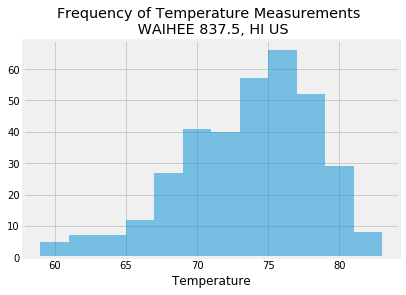

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
print(f"Top station: {top_station}")

top_df = pd.read_sql(session.query(Measurement.id, Measurement.date, Measurement.prcp, Measurement.station,Measurement.tobs).\
                filter(Measurement.station==stations_count.station[0]).\
                filter(Measurement.date >= year_ago_date).\
                 order_by(Measurement.date.asc()).statement,session.bind)
top_temp_df = top_df["tobs"]


plt.hist(top_df["tobs"],bins=12, alpha=0.5)

plt.title(f"Frequency of Temperature Measurements \n {top_station}")
plt.xlabel('Temperature')

![precipitation](Images/station-histogram.png)

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_start_date = "2017-05-24"
trip_end_date = "2017-05-28"
trip_dates = calc_temps(trip_start_date,trip_end_date)
print(trip_dates)

[(69.0, 75.10344827586206, 82.0)]


In [34]:
xxx = pd.read_sql((session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= trip_start_date).filter(Measurement.date <= trip_end_date)).statement,session.bind)

# df = pd.read_sql(session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
#         filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()).statement,session.bind
xxx

min_1      avg_1  max_1
0   69.0  75.103448   82.0

In [35]:
min_temp = trip_dates[0][0]
avg_temp = trip_dates[0][1]
max_temp = trip_dates[0][2]
label = [f"{trip_start_date} through {trip_end_date}"]
x_pos = np.arange(len(label))
type(min_temp)

float

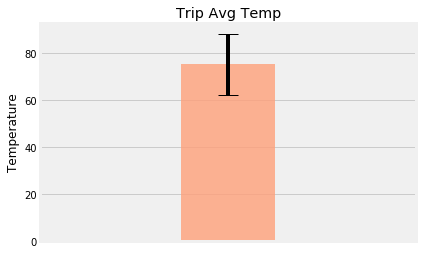

<Figure size 432x288 with 0 Axes>

In [36]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
ax.bar(x_pos, avg_temp, yerr=(max_temp-min_temp), align='center', alpha=0.8, color="lightsalmon", ecolor='black', capsize=10,width=0.02)
ax.set_ylabel('Temperature')
ax.set_xticks([])
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)
plt.xlim(-.04,.04)
plt.show()

plt.savefig("test.png")

In [46]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

trip_prec = pd.read_sql(session.query(Measurement.id, Measurement.date, \
                                      Measurement.prcp, Measurement.station,Measurement.tobs).\
                 filter(Measurement.date >= trip_start_date).\
                 filter(Measurement.date <= trip_end_date).statement,session.bind)
trip_prec = trip_prec.groupby(by='station').sum()
trip_prec=trip_prec.sort_values("prcp",ascending=False)
trip_rainfall = pd.merge(trip_prec,stat_all,how="left",on="station")
trip_rainfall



station     id  prcp   tobs  Station Id  \
0  USC00516128  97330  3.55  362.0           9   
1  USC00513117  26835  1.26  357.0           2   
2  USC00519523  60530  1.16  389.0           6   
3  USC00519281  74420  0.58  376.0           7   
4  USC00519397  10554  0.31  304.0           1   
5  USC00514830  37800  0.19  390.0           3   

                                     name  latitude  longitude  elevation  
0            MANOA LYON ARBO 785.2, HI US  21.33310 -157.80250      152.4  
1                    KANEOHE 838.1, HI US  21.42340 -157.80150       14.6  
2      WAIMANALO EXPERIMENTAL FARM, HI US  21.33556 -157.71139       19.5  
3                     WAIHEE 837.5, HI US  21.45167 -157.84889       32.9  
4                    WAIKIKI 717.2, HI US  21.27160 -157.81680        3.0  
5  KUALOA RANCH HEADQUARTERS 886.9, HI US  21.52130 -157.83740        7.0

## Optional Challenge Assignment

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
